### Question 1

#### all methods here

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

data = 0 
def Fanaly(x): 
  return (0.5 * (x + x**2 + 2))**2

b0, b1 = 0, 1

h = 0.25
n = int(abs(b1-b0)/h); print(n)


xplot = np.linspace(b0,b1,n+1)
xdense = np.linspace(0,1)
#plt.scatter(xplot,Fanaly(xplot),ec='k')
#plt.plot(xdense,Fanaly(xdense),alpha=0.4)
#plt.show()

x = np.linspace(b0,b1,n+1)
y_analy = Fanaly(x)

columns = ['x','analytical']
data = np.column_stack((x,y_analy)) 

4


In [ ]:
def f(y,t): 
  return (1+2*t) * np.sqrt(y)

def eulers(f,bounds,t0,y0,h):
  b0, b1 = bounds
  n = int(abs(b1-b0)/h)
  t = np.linspace(b0,b1,n+1)
  y = np.zeros(t.shape[0])
  y[0] = y0

  for i in range(len(t)-1):  
    y[i+1] = y[i] + f(y[i],t[i])*h
  
  return t,y

_, y = eulers(f,(0,1),0,1,0.25)
print(y)
columns.append('Eulers')
data = np.column_stack((data,y))


[1.         1.25       1.66926275 2.3152625  3.26626167]


In [ ]:

def huen_noiter(f,bounds,t0,y0,h): 
  b0, b1 = bounds
  n = int(abs(b1-b0)/h)
  t = np.linspace(b0,b1,n+1)
  y = np.zeros(t.shape[0])
  yP = np.zeros(t.shape[0])

  y[0] = y0 

  for i in range(len(t)-1): 
    M0    = f(t[i],y[i]) # slope
    y0   = y[i] + f(t[i],y[i])*h  # predictor
    ybar = (M0 + f(t[i+1],y0))*0.5
    y[i+1]  = y[i] + ybar*h
  return t,y

def f(t,y): 
  return (1 + 2*t) * np.sqrt(y)

_,y = huen_noiter(f,(0,1),0,1,0.25); print(y)
columns.append('Heun')
data = np.column_stack((data,y))

[1.         1.33463137 1.88364484 2.72772307 3.97099073]


In [ ]:
def ralston(f,bounds,x0,y0,h): 
  b0, b1 = bounds
  n = int(abs(b1-b0)/h)
  t = np.linspace(b0,b1,n+1)
  y = np.zeros(t.shape[0])
  
  y[0] = y0

  for i in range(len(t) - 1): 
    k1 = f(y[i],t[i])
    k2 = f(y[i]+(2/3)*k1*h, t[i] + (2/3)*h)
    print(k1,k2)
    y[i+1] = y[i] + ( (1/4)*k1 + (3/4)*k2 )*h 
  
  return t,y

def f(y,t): 
  return (1 + 2*t) * np.sqrt(y)

_,y = ralston(f,(0,1),0,1,0.25); print(y)
columns.append('Ralston')
data = np.column_stack((data,y))


1.0 1.4401645996461911
1.7315295089820841 2.334258226132445
2.741112820841108 3.5657097398014534
4.1218283273780765 5.228468456924196
[1.         1.33253086 1.87842487 2.718315   3.95626711]


In [ ]:

def f(x,y): 
  return (1+2*x) * np.sqrt(y)

from scipy.integrate import solve_ivp

res = solve_ivp(f,(b0,b1),(0,1),t_eval=x,method='RK45')
print(res)
print('')
#plt.plot(xdense,Fanaly(xdense),alpha=0.4)
#plt.scatter(x,res.y[1],ec='k')
#plt.show()

columns.append('RK4')
data = np.column_stack((data,res.y[1]))


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.  , 0.25, 0.5 , 0.75, 1.  ])
 t_events: None
        y: array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.33685683, 1.8905497 , 2.74338016, 4.00050856]])
 y_events: None



#### Just the answers

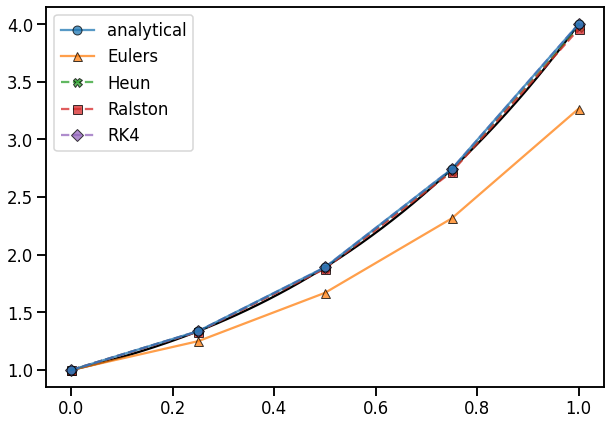

,x,analytical,Eulers,Heun,Ralston,RK4
0,0.00,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.25,1.336914,1.250000,1.334631,1.332531,1.336857
2,0.50,1.890625,1.669263,1.883645,1.878425,1.890550
3,0.75,2.743164,2.315263,2.727723,2.718315,2.743380
4,1.00,4.000000,3.266262,3.970991,3.956267,4.000509


In [ ]:
df = pd.DataFrame(data,columns=columns)

import seaborn as sb 
sb.set_context('talk')
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(xdense,Fanaly(xdense),c='k')
ax.plot(df.x,df.analytical,'-o',label='analytical',mec='k',alpha=0.75,zorder=10)
ax.plot(df.x,df.Eulers,'-^',label='Eulers',mec='k',alpha=0.75)
ax.plot(df.x,df['Heun'],'--X',label='Heun',mec='k',alpha=0.75) 
ax.plot(df.x,df['Ralston'],'--s',label='Ralston',mec='k',alpha=0.75) 
ax.plot(df.x,df['RK4'],'--D',label='RK4',mec='k',alpha=0.75) 
ax.legend()
plt.show()


df

### Question 2

(Code Answer Required) Solve the following pair of ODEs over the interval from t = 0 to 0.4 using a step size of 0.1.
The initial conditions are y(0) = 2 and z(0) = 4. Obtain your solution with (a) Euler’s method and (b) the fourth-order
RK method. Display your results as a plot. 

$ \frac{dy}{dt} = -2y + 4e^-t$

$ \frac{dz}{dt} = \frac{yz^2}{3}$

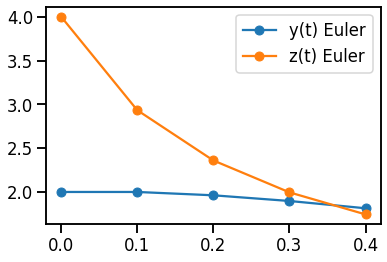

,t,y,z
0,0.0,2.000000,4.000000
1,0.1,2.000000,2.933333
2,0.2,1.961935,2.359704
3,0.3,1.897040,1.995555
4,0.4,1.813960,1.743740


In [ ]:
#(a)

# given 
def f1(t,y,z): 
  return -2*y + 4*np.exp(-t)

def f2(t,y,z): 
  return -(y*z**2)/3

def single_euler(f,args,gi,h): 
  '''
  single iteration of euler integration, where gi is the 
  approximation at timestep ti. 
  '''
  ynew = gi + f(*args)*h
  return ynew

b0,b1 = 0, 0.4
h = 0.1
n = int(abs(b1-b0)/h)

t0,y0,z0 = 0.0,2,4
args = (t0,y0,z0)#;print(t0,y0,z0)
ynew = single_euler(f1,args,y0,h)
znew = single_euler(f2,args,z0,h)

data = []
data.append([t0,y0,z0])

for i in range(n):
  t0,y0,z0 = t0+h,ynew,znew
  #print(t0,ynew,znew)
  data.append([t0,ynew,znew])
  args = (t0,ynew,znew)
  ynew = single_euler(f1,args,y0,h)
  znew = single_euler(f2,args,z0,h)
  
data = pd.DataFrame(data,columns=['t','y','z'])

plt.plot(data.t,data.y,'-o',label='y(t) Euler')
plt.plot(data.t,data.z,'-o',label='z(t) Euler')
plt.legend()
plt.show()
data



$ \frac{dy}{dt} = -2y + 4e^-t$

$ \frac{dz}{dt} = \frac{yz^2}{3}$

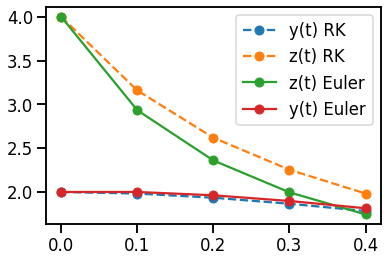

RK Results
     t         y         z
0  0.0  2.000000  4.000000
1  0.1  1.981894  3.158860
2  0.2  1.934294  2.619085
3  0.3  1.865645  2.253460
4  0.4  1.782618  1.981964


In [ ]:
# I will solve as a system of linear eqs. 

def fsys(t,x): 
  """
  define a set of equations as a function of input
  arguments x = (y,z) and t. 
  """
  y,z = x 
  dydt = -2*y + 4*np.exp(-t)
  dzdt = -y*z**2*(1/3) 
  return [dydt,dzdt]

b0, b1 = 0.0, 0.4
h = 0.1
n = int(abs(b1-b0)/h)
x0 = [2,4]
t = np.linspace(b0,b1,n+1)


res = solve_ivp(fsys,(b0,b1),x0,t_eval=t)
y,z = res.y[0],res.y[1]
res = np.column_stack((t,y,z))

plt.plot(t,y,'--o',label='y(t) RK')
plt.plot(t,z,'--o',label='z(t) RK')
plt.plot(data.t,data.z,'-o',label='z(t) Euler')
plt.plot(data.t,data.y,'-o',label='y(t) Euler')
plt.legend()
plt.show()

res = pd.DataFrame(res,columns=['t','y','z'])
print('RK Results')
print(res)

### (3) 
Solve the following initial-value problem over the interval from t = 2 to 3:

$ \frac{dy}{dt} = -0.5y + e^t $ 

Use the non-self-starting Heun method with a step size of 0.5 and initial conditions of y(1.5) = 5.222138 and y(2.0) =
4.143883. Iterate the corrector to $\epsilon_s$ = 0.1%. Compute the percent relative errors for your results based on the exact
solutions obtained analytically: y(2.5) = 3.273888 and y(3.0) = 2.577988.


compare Huen non-self starting with non-iterating Huen



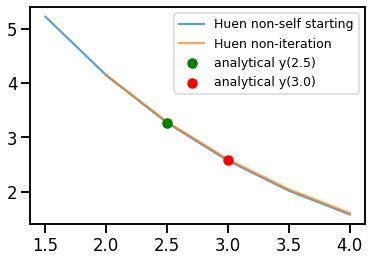

     t  Huen NSS  Huen Regular  y_analytical  Huen NSS Error  Huen Reg Error
0  1.5  5.222138           NaN      0.000000             inf             NaN
1  2.0  4.143883      4.143883      0.000000             inf             inf
2  2.5  3.269448      3.283305      3.273888        0.135627        0.287646
3  3.0  2.571506      2.592920      2.577988        0.251431        0.579207
4  3.5  2.018171      2.042603      0.000000             inf             inf
5  4.0  1.581692      1.606025      0.000000             inf             inf

The Huen method provides a good estimate of the true solution, 
but the Huen non-self starting (NSS) has lower true error. 


In [ ]:
# define my non-self starting with iteration huen function
def huen(f,bounds,t0,t1,y0,y1,h,tol=1e-1): 
  max_iter = 100
  b0, b1 = bounds
  n = int(abs(b1-b0)/h)
  
  t = [t0] + list(np.linspace(b0,b1,n+1))
  t = np.array(t)
  t[0] = t0
  t[1] = t1

  y = np.zeros(t.shape[0])
  y[0] = y0
  y[1] = y1

  for k in range(len(t)): 
    i = k-1
    if i < 1: 
      continue
    else: 
      yP = y[i-1] + f(y[i],t[i])*2*h
      yc = y[i] + 0.5 * h * ( f(t[i],y[i]) + f(t[i+1],yP) ) 
      err = 100
      for K in range(max_iter): 
        yc_new = y[i] + 0.5 * h * ( f(t[i],y[i]) + f(t[i+1],yc) )
        err = 100 * abs(yc_new - yc)/yc
        #print(err)
        if err < tol: 
          break
        else:
          yc = yc_new
    #print(i,t[i],y[i],yP,yc,err)
    y[i+1] = yc

  #print(i,t[i],y[i],yP,yc,err)
  return t,y

def f(t,y):
  return -0.5*y + np.exp(-t)

bounds = (2,4)
t0 = 1.5
t1 = 2 
y0 = 5.222138
y1 = 4.143883
h = 0.5

#print('i',  't[i]',   'y[i]',   'yP',   'yc',   'err')
t,y  = huen(f,bounds,t0,t1,y0,y1,h)

analy = np.zeros(len(t)) 
analy[2] = 3.273888
analy[3] = 2.577988

plt.plot(t,y,alpha=0.7,label='Huen non-self starting')

# compare with
print('compare Huen non-self starting with non-iterating Huen\n')

tt,yy = huen_noiter(f,bounds,t,y1,h)
Y = [np.nan] + list(yy)
df = pd.DataFrame(np.column_stack((t,y,Y,analy)),columns=['t','Huen NSS','Huen Regular','y_analytical'])
df['Huen NSS Error'] = 100 * abs(df.y_analytical - df['Huen NSS'])/df.y_analytical
df['Huen Reg Error'] = 100 * abs(df.y_analytical - df['Huen Regular'])/df.y_analytical
plt.plot(tt,yy,alpha=0.7,label='Huen non-iteration')
plt.scatter(2.5,3.273888,label='analytical y(2.5)',c='g',zorder=10)
plt.scatter(3.0,2.577988,label='analytical y(3.0)',c='r',zorder=10)
plt.legend(fontsize='x-small')
plt.show()
print(df)
print('')
print('The Huen method provides a good estimate of the true solution, \nbut the Huen non-self starting (NSS) has lower true error. ')

### (4) 
 Solve the following initial-value problem over the interval from t = 0 to t = 0.5

 $\frac{dy}{dt} = yt^2 - y$

Use the fourth-order RK method to predict the first value at t = 0.25. Then use the non-self-starting Heun method to
make the prediction at t = 0.5. Note: y(0) = 1.

[0.   0.25 0.5 ]
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 11
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f4afa394ad0>
   status: 0
  success: True
        t: array([0.  , 0.25, 0.5 ])
 t_events: None
        y: array([[1.        , 0.78281724, 0.63221007]])
 y_events: None


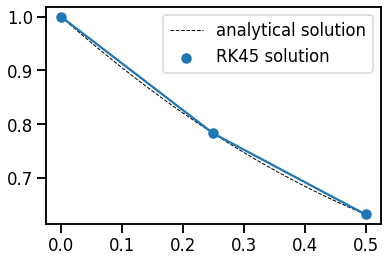

y(x=0.25) = [0.78281724]


In [ ]:
#res = solve_ivp(f,(b0,b1),(0,1),t_eval=x,method='RK45')

def f(t,y): 
  return y*t**2 - y

# for checking answers
def Fanaly(t): 
  return np.exp((1/3)*t**3 - t)


from scipy.integrate import solve_ivp

b0,b1 = 0, 0.5
t_span = (b0,b1)
y0 = 1 
h = 0.25
n = int(abs(b1-b0)/h)
t_eval=np.linspace(0,0.5,n+1)
print(t_eval)
res = solve_ivp(f,(b0,b1),[y0],t_eval=t_eval,method='RK23',dense_output=True)

print(res)

xdense = np.linspace(0,0.5,100)
plt.plot(xdense,Fanaly(xdense),label='analytical solution',c='k',zorder=-1,ls='--',lw=1)
plt.scatter(res.t,res.y[0],label='RK45 solution')
plt.plot(res.t,res.y[0])
plt.legend()
plt.show() 
y1 = res.sol(0.25)
print(f'y(x=0.25) = {y1}')

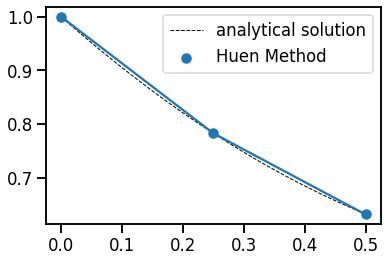

[[0.         1.        ]
 [0.25       0.78281724]
 [0.5        0.63158187]]

y(3.0) = 0.6315818720535153


In [ ]:
#huen(f,bound,t0,t1,y0,y1,h,tol)

t,y = huen(f,(0.25,0.5), 0,0.25, 1,y1, h=0.25,tol=1e-1)
plt.plot(t,y)
plt.scatter(t,y,label='Huen Method')
plt.plot(xdense,Fanaly(xdense),label='analytical solution',c='k',zorder=-1,ls='--',lw=1)
plt.legend()
plt.show() 
print(np.column_stack((t,y)))
print(f'\ny(3.0) = {y[-1]}')

### 5 

Solve the following differential equation using the finite-difference method using

$7\frac{d^2y}{dx^2} - 2\frac{dy}{dx} -y + x = 0$

The boundary conditions are y(0) = 5 and y(20)=8, and use the increment: Δx = 2.

The general analytical solution is

$y(x) = c_1  e^(\frac{1+2\sqrt(2)x}{7}) + c_2  e^(\frac{1-2\sqrt(2)x}{7}) $

Solving for $c_1$ and $c_2$ 

In [ ]:
# Analytical solution


# setup system of eqs.
k1 = (1 + 2*np.sqrt(2))/7
k2 = (1 - 2*np.sqrt(2))/7
 
A = np.array([
              [np.exp(k1*0), np.exp(k2*0)],
              [np.exp(k1*20), np.exp(k2*20)],
              ])
b = np.array([7,-10])

print(f"A = \n{A}\n")
# solve for the c1 and c2 constants
C1, C2 = np.linalg.solve(A,b)
print('C1 and C2 = ')
print(C1,C2)


def fanaly(x,c1,c2):
  e1 = 1 + 2*np.sqrt(2)
  e2 = 1 - 2*np.sqrt(2)
  return c1*np.exp(e1*x/7) + c2*np.exp(e2*x/7) + x - 2 




A = 
[[1.00000000e+00 1.00000000e+00]
 [5.62951246e+04 5.38532564e-03]]

C1 and C2 = 
-0.0001783049297990012 7.000178304929799


Using central-finite difference, the function is transformed to

$ 7[\frac{ y_{i-1} - 2y_i + y_{i+1}}{h^2}] - 2 [\frac{ -y_{i-1} + y_{i+1}}{2h}] - y_i = - x $ 

Build a matrix solving with three matrix constants:  
$c_{i-1} = 7 + h $,  
$c_i   = -14 - h^2 $,  
$c_{i+1} = 7 - h$ 

9 -18 5

A Matrix: 
      0     1     2     3     4     5     6     7     8
0 -18.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1   9.0 -18.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0
2   0.0   9.0 -18.0   5.0   0.0   0.0   0.0   0.0   0.0
3   0.0   0.0   9.0 -18.0   5.0   0.0   0.0   0.0   0.0
4   0.0   0.0   0.0   9.0 -18.0   5.0   0.0   0.0   0.0
5   0.0   0.0   0.0   0.0   9.0 -18.0   5.0   0.0   0.0
6   0.0   0.0   0.0   0.0   0.0   9.0 -18.0   5.0   0.0
7   0.0   0.0   0.0   0.0   0.0   0.0   9.0 -18.0   5.0
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   9.0 -18.0

b Matrix: 
       0
0  -53.0
1  -16.0
2  -24.0
3  -32.0
4  -40.0
5  -48.0
6  -56.0
7  -64.0
8 -112.0



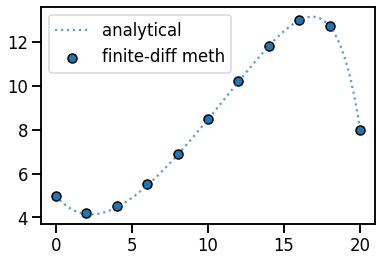

In [ ]:

# Boundary conditions
b0,b1 = 0,20
x0,xN = 0, 20
y0,yN = 5, 8
h = 2
n = int(abs(b1-b0)/h) - 1

# setup matrix
A = np.zeros((n,n))

# define matrix constants
h2 = h**2
c_back = 7 + h 
c      = -14 - h2
c_forw = 7 - h

# build matrix
print(c_back,c,c_forw)
for i in range(1,n-1):
  for j in range(n):
    if i==j:
      A[i,j]=c
    elif j==i-1:
      A[i,j]=c_back
    elif j==i+1:
      A[i,j]=c_forw
    else:
      A[i,j]=0.0
A[0,:2] =   c, c_forw
A[-1,-2:] = c_back, c

# setup b matrix 
b = np.linspace(0,20,n+2)
b = b[1:-1]  
b[1:-1] = b[1:-1] * -h2  
b[0] = b[0]*-h2 - c_back*y0
b[-1] = b[-1]*-h2 - c_forw*yN

# solve 
y = np.linalg.solve(A,b)

Y = [y0] + list(y) + [yN]
t = np.linspace(b0,b1,len(Y))
print('')
print('A Matrix: ')
print(pd.DataFrame(A))
print('')
print('b Matrix: ')
print(pd.DataFrame(b))
print('')
xdense = np.linspace(0,20,100)
plt.plot(xdense,fanaly(xdense,C1,C2),label='analytical',ls=':',alpha=0.7)
plt.scatter(t,Y,ec='k',label='finite-diff meth')
plt.legend()
plt.show()